In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
# First, we should call data sets from splitting section


%store -r x_train
x_train = x_train

%store -r y_train
y_train = y_train

%store -r x_val
x_val = x_val

%store -r y_val
y_val = y_val

%store -r x_test
x_test = x_test

%store -r y_test
y_test = y_test

In [3]:
# in the next section, based on each model, we define specific pipeline and build and train mmodel

def evaluate_model(x_train, y_train, x_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validation on training set
    cross_val_r2 = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    # Fit final model on full training data
    model.fit(x_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

In [4]:
# Model Training
# Linear Regression

model = Pipeline([
    ("scaler", StandardScaler()), #This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(x_train, y_train, x_val, y_val, model)

Training CV R2: 0.9991, Training CV RMSE: -95.2011
Training R2: 0.9991, Training RMSE: 95.8568
Validation R2: 0.9996, Validation RMSE: 63.3000


In [9]:
# This Model is not underfit(bith CV and Validation are high) and overfit(CV and Validation are close to each other)

In [5]:
#Decision Tree Regressor

model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(x_train, y_train, x_val, y_val, model)

Training CV R2: 0.8931, Training CV RMSE: -1029.0378
Training R2: 1.0000, Training RMSE: 0.0000
Validation R2: 0.8941, Validation RMSE: 1011.5344


In [11]:
# This model is overfit(CV train and train have gap).But, since the gap between CV train and validation is small, that overfitting is not severe.

In [6]:
# Random Forest Regressor

model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])

evaluate_model(x_train, y_train, x_val, y_val, model)

Training CV R2: 0.9600, Training CV RMSE: -626.5452
Training R2: 0.9949, Training RMSE: 223.4364
Validation R2: 0.9630, Validation RMSE: 597.5182


In [13]:
# Support Vector Regression

model = Pipeline([
    ("scaler", StandardScaler()), #Scaling the features
    ("svr", SVR(kernel = 'rbf'))
])

evaluate_model(x_train, y_train, x_val, y_val, model)

Training CV R2: 0.0685, Training CV RMSE: -3027.3353
Training R2: 0.0862, Training RMSE: 2999.4412
Validation R2: 0.0855, Validation RMSE: 2971.9019


In [15]:
# CatBoost Regression

model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(x_train, y_train, x_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 116ms	remaining: 1m 56s
1:	learn: 2890.4135878	total: 119ms	remaining: 59.3s
2:	learn: 2774.6653173	total: 121ms	remaining: 40.3s
3:	learn: 2665.5842386	total: 124ms	remaining: 30.8s
4:	learn: 2567.5958915	total: 127ms	remaining: 25.3s
5:	learn: 2469.5098712	total: 130ms	remaining: 21.5s
6:	learn: 2376.9738903	total: 132ms	remaining: 18.7s
7:	learn: 2297.0043203	total: 134ms	remaining: 16.6s
8:	learn: 2215.1927629	total: 137ms	remaining: 15s
9:	learn: 2139.8163751	total: 139ms	remaining: 13.7s
10:	learn: 2063.5877621	total: 141ms	remaining: 12.7s
11:	learn: 1992.1604502	total: 143ms	remaining: 11.8s
12:	learn: 1923.5305228	total: 146ms	remaining: 11.1s
13:	learn: 1858.1751387	total: 148ms	remaining: 10.4s
14:	learn: 1799.7401392	total: 151ms	remaining: 9.89s
15:	learn: 1743.3864607	total: 153ms	remaining: 9.4s
16:	learn: 1686.5267358	total: 155ms	remaining: 8.98s
17:	learn: 1628.8700788	total: 158ms	remaining: 8.6s
18:	learn: 

In [7]:
#XGBoost Regressor

model = Pipeline([
    ("scaler", StandardScaler()), #Scaling the features
    ("xgb", XGBRegressor(objective = 'reg:squarederror'))
])

evaluate_model(x_train, y_train, x_val, y_val, model)

Training CV R2: 0.9920, Training CV RMSE: -280.2197
Training R2: 0.9986, Training RMSE: 116.9903
Validation R2: 0.9928, Validation RMSE: 264.4133


In [8]:
# Tune Model and Hyper-Parameter
# Now in this section, we try to tune model and improve its performance

from catboost import CatBoostRegressor

In [9]:
# Best model for tuning
best_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    random_state=42,
    verbose=0
)


In [10]:
param_grid = {
    'iterations': [100, 200],          # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],# Step size at each iteration
    'depth': [4, 6, 8],                # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],          # L2 regularization coefficient
    'border_count': [32, 64]           # Number of splits in categorical features
}

grid_search = GridSearchCV(estimator=best_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'border_count': 64, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [11]:
best_model_tuned = grid_search.best_estimator_

In [12]:
best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, x_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = cross_val_score(best_model_tuned, x_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(x_train, y_train)
y_train_pred = best_model_tuned.predict(x_train)
y_val_pred = best_model_tuned.predict(x_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Training CV R2: 0.9992, Training CV RMSE: -86.8348
Training R2: 0.9995, Training RMSE: 68.0681
Validation R2: 0.9994, Validation RMSE: 78.3520


In [13]:
final_model = best_model_tuned

In [14]:
final_model.fit(x_train, y_train)

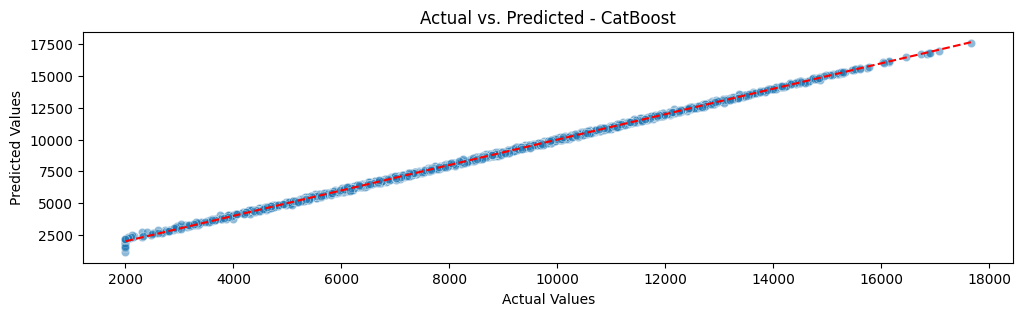

In [15]:
# Final Evaluation of Model

# Scatter PLot: Actual vs Predicted
plt.figure(figsize = (12,3))

sns.scatterplot(x = y_val,
                y = y_val_pred,
                alpha = 0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color = 'red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()

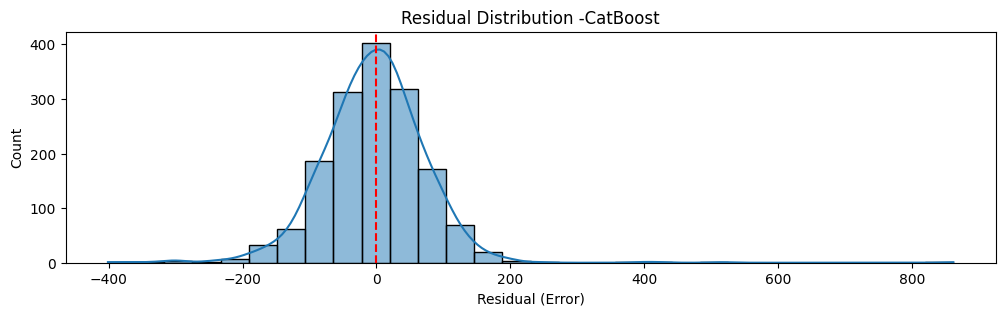

In [16]:
# Residual Plot (Errors)

residuals = y_val - y_val_pred

plt.figure(figsize = (12,3))
sns.histplot(residuals, bins = 30, kde = True)
plt.axvline(0, color = 'red', linestyle = 'dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution -CatBoost")
plt.show()

In [17]:
# Apply Model on Test Data
# Here, that we are happy with model of the project, we can predict the price on test data. But, before prediction, we need to encode categorical preprocessing we did.

with open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f)   # Brand

with open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f)   # Model

with open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f)  # Fuel, Transmission

In [18]:
# In the next step we should encode categorical features

# Encoding Brand and Model
x_test['Encoded_Brand'] = x_test['Brand'].map(brand_encoder)
x_test['Encoded_Model'] = x_test['Model'].map(model_encoder)
x_test['Encoded_Brand'].fillna(x_test['Encoded_Brand'].mean(), inplace=True)
x_test['Encoded_Model'].fillna(x_test['Encoded_Model'].mean(), inplace=True)
x_test.drop(['Brand', 'Model'], axis=1, inplace=True)

# Encoding Fuel and Transmission
categorical_cols = ['Fuel', 'Transmission']
encoded_array_test = onehot_encoder.transform(x_test[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Merge encoded columns with test data
x_test_encoded = x_test.drop(columns=categorical_cols).reset_index(drop=True)
x_test = pd.concat([x_test_encoded, encoded_df_test], axis=1)

In [19]:
# Now we can predict test data

y_test_pred = final_model.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

Test R2: 0.9994, Test RMSE: 75.2086


In [21]:
pickle.dump(final_model, open('C:/Users/Hrithik Doiphode/OneDrive/Desktop/Project/CarPricePrediction/models/Model.pkl','wb'))